In [1]:
import os
import re
import pandas as pd



In [2]:
EXPERIMENT_NAME = "AS004"
WAVELENGTH = "532nm"
EXPERIMENT_FOLDER = EXPERIMENT_NAME + "_" +WAVELENGTH

data_dir = os.path.join('/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/', EXPERIMENT_FOLDER)


spectrocopy_files = [f for f in os.listdir(data_dir)
                    if f.endswith('.txt')]

# trie dans l'ordre croissant en extrayant la partie numérique
spectrocopy_files = sorted(
    spectrocopy_files,
    key=lambda x: int(re.search(r'_(\d+)\.txt$', x).group(1)) 
)

print(spectrocopy_files)

['AS004_01.txt', 'AS004_02.txt', 'AS004_03.txt', 'AS004_04.txt', 'AS004_05.txt', 'AS004_06.txt', 'AS004_07.txt', 'AS004_08.txt', 'AS004_09.txt', 'AS004_10.txt', 'AS004_11.txt', 'AS004_12.txt', 'AS004_13.txt', 'AS004_14.txt']


In [3]:
file_path = os.path.join(data_dir, spectrocopy_files[0])
# 1) Repérer l’index de la ligne qui commence par 'Pixel;'
with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
header_idx = next(i for i, line in enumerate(lines)
                  if line.strip().startswith('Pixel;'))


# 2) Lire le fichier en sautant les lignes avant l’en-tête
df = pd.read_csv(file_path,
                 skiprows=header_idx,
                 sep = ";",
                 decimal=",",
                 encoding='utf-8',
                 skipinitialspace=True, # enlève les espaces après le séparateur
                 na_values=["", " ", "   ", "\t"], # traite les champs blancs comme NaN
                 keep_default_na=True
                 )

# 3) Supprimer la dernière colonne si elle est vide (souvent nommée 'Unnamed: ...')
if df.columns[-1].startswith('Unnamed'):
    df = df.iloc[:, :-1]

# 4) Convertir les colonnes de type 'object' en numérique (coerce remplace les valeurs non convertibles par NaN)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df.head(15)

,Pixel,Wavelength,Wavenumber,Raman Shift,Dark,Reference,Raw data #1,Dark Subtracted #1,%TR #1,Absorbance #1,Irradiance (lumen) #1
0,0,NaN,NaN,NaN,1138.0000,1148.3333,1148.3333,10.3333,100.0,0.0,0.0
1,1,NaN,NaN,NaN,1172.0000,1156.3333,1156.3333,-15.6667,0.0,0.0,0.0
2,2,NaN,NaN,NaN,1137.3333,1115.0000,1115.0000,-22.3333,0.0,0.0,0.0
3,3,NaN,NaN,NaN,1118.6667,1125.3333,1125.3333,6.6667,100.0,0.0,0.0
4,4,NaN,NaN,NaN,1151.3333,1186.0000,1186.0000,34.6667,100.0,0.0,0.0
5,5,NaN,NaN,NaN,1067.6667,1098.6667,1098.6667,31.0000,100.0,0.0,0.0
6,6,NaN,NaN,NaN,1073.0000,1149.3333,1149.3333,76.3333,100.0,0.0,0.0
7,7,NaN,NaN,NaN,1112.6667,1100.0000,1100.0000,-12.6667,0.0,0.0,0.0
8,8,NaN,NaN,NaN,1119.0000,1172.3333,1172.3333,53.3333,100.0,0.0,0.0
9,9,NaN,NaN,NaN,1105.0000,1234.3333,1234.3333,129.3333,100.0,0.0,0.0


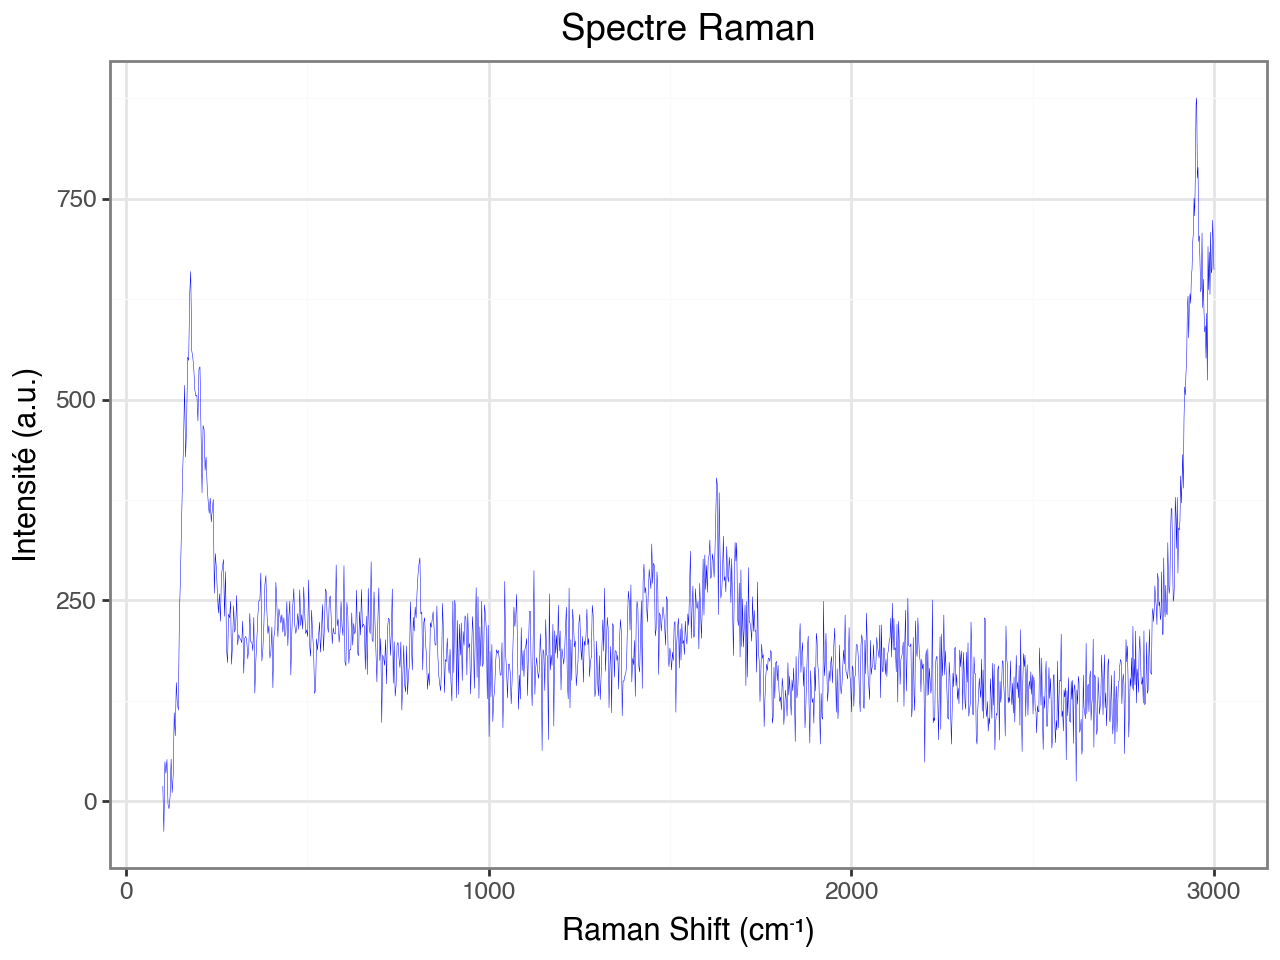

In [4]:
from plotnine import ggplot, aes, geom_line, theme_bw, labs

# On suppose que df contient les colonnes "Raman Shift" et "Dark Subtracted #1"
df = df[(df["Raman Shift"] >= 100) & (df["Raman Shift"] <= 3500)]
p = (ggplot(df, aes(x="Raman Shift", y="Dark Subtracted #1"))
     + geom_line(color="blue", size=0.1)
     + theme_bw()
     + labs(title="Spectre Raman",
            x="Raman Shift (cm⁻¹)",
            y="Intensité (a.u.)")
)

p

On essaye maintenant de travailler avec tout les fichier

In [5]:
import os
import re
import pandas as pd

all_data = []

for fname in spectrocopy_files:   # ta liste triée
    file_path = os.path.join(data_dir, fname)

    # repérer la ligne de l'en-tête
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    header_idx = next(i for i, line in enumerate(lines)
                      if line.strip().startswith('Pixel;'))

    # lire le fichier
    df = pd.read_csv(file_path,
                     skiprows=header_idx,
                     sep=";",
                     decimal=",",
                     encoding="utf-8",
                     skipinitialspace=True,
                     na_values=["", " ", "   ", "\t"],
                     keep_default_na=True)

    # supprimer la dernière colonne si vide
    if df.columns[-1].startswith("Unnamed"):
        df = df.iloc[:, :-1]

    # convertir en numérique
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # garder seulement les colonnes utiles
    temp = df[["Wavenumber", "Wavelength", "Raman Shift", "Dark Subtracted #1"]].copy()
    temp = temp.dropna() # on supprime les lignes avec des NaN

    # ajouter une colonne "fichier"
    temp["file"] = fname

    # stocker dans la liste
    all_data.append(temp)

# fusionner tous les fichiers
spectra_df = pd.concat(all_data, ignore_index=True)

print(spectra_df.head())
print(spectra_df["file"].unique())

   Wavenumber  Wavelength  Raman Shift  Dark Subtracted #1          file
0    18799.81      531.92        -4.95            299.3333  AS004_01.txt
1    18796.91      532.00        -2.05            228.0000  AS004_01.txt
2    18794.01      532.08         0.86            139.3333  AS004_01.txt
3    18791.11      532.17         3.76              7.6667  AS004_01.txt
4    18788.21      532.25         6.65             27.6667  AS004_01.txt
['AS004_01.txt' 'AS004_02.txt' 'AS004_03.txt' 'AS004_04.txt'
 'AS004_05.txt' 'AS004_06.txt' 'AS004_07.txt' 'AS004_08.txt'
 'AS004_09.txt' 'AS004_10.txt' 'AS004_11.txt' 'AS004_12.txt'
 'AS004_13.txt' 'AS004_14.txt']


In [6]:
spectra_df 

,Wavenumber,Wavelength,Raman Shift,Dark Subtracted #1,file
0,18799.81,531.92,-4.95,299.3333,AS004_01.txt
1,18796.91,532.00,-2.05,228.0000,AS004_01.txt
2,18794.01,532.08,0.86,139.3333,AS004_01.txt
3,18791.11,532.17,3.76,7.6667,AS004_01.txt
4,18788.21,532.25,6.65,27.6667,AS004_01.txt
...,...,...,...,...,...
18125,15799.99,632.91,2994.87,1644.6667,AS004_14.txt
18126,15798.17,632.98,2996.70,1800.3333,AS004_14.txt
18127,15796.35,633.06,2998.52,1727.0000,AS004_14.txt
18128,15794.53,633.13,3000.34,1614.3333,AS004_14.txt


/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors
/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors


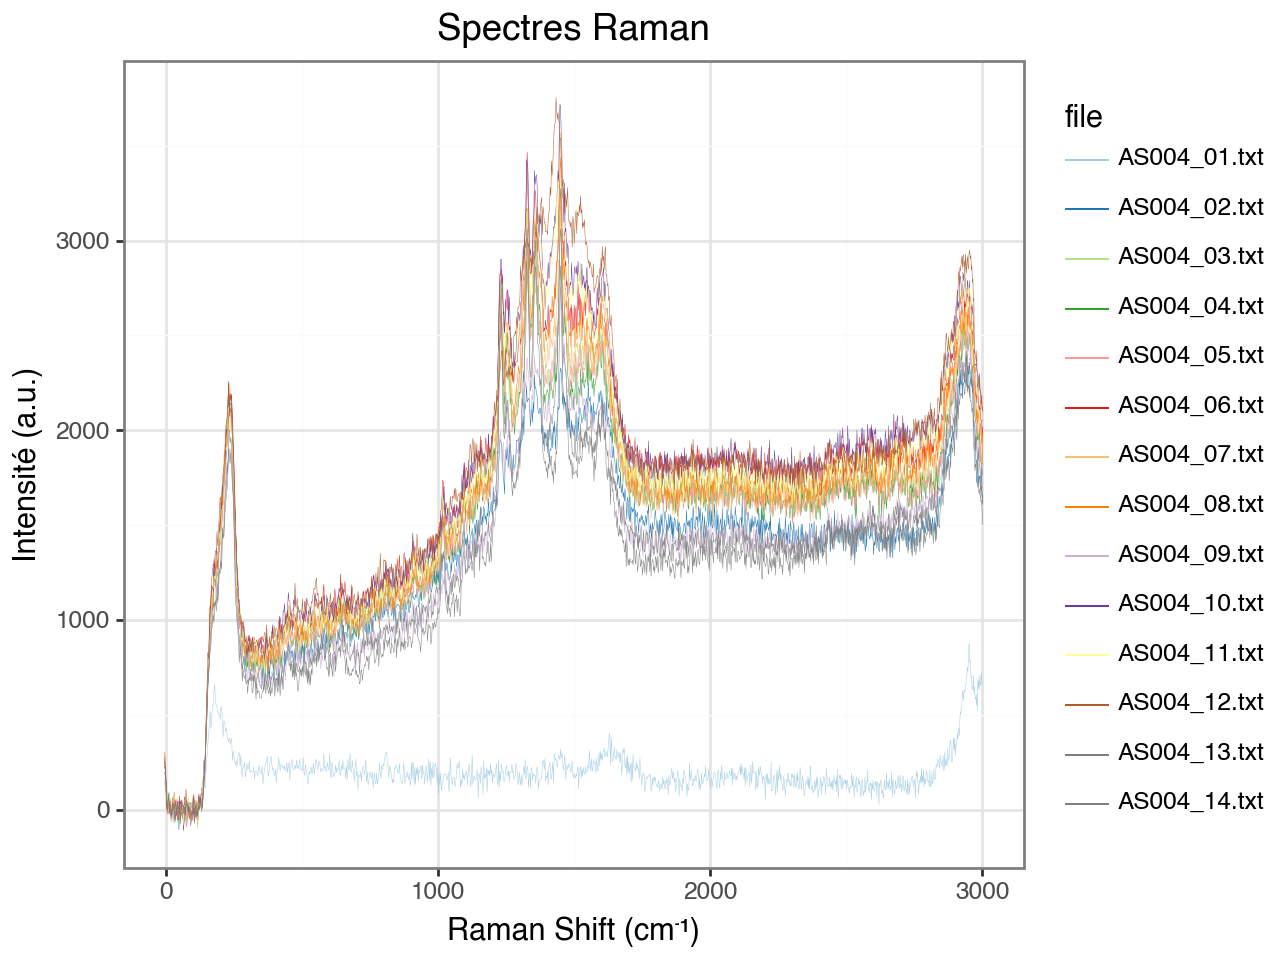

In [7]:
from plotnine import ggplot, aes, geom_line, theme_bw, labs, scale_color_brewer

p = (
    ggplot(spectra_df, aes(x="Raman Shift", y="Dark Subtracted #1", color="file"))
    + geom_line(size=0.1)
    + theme_bw()
    + labs(
        title="Spectres Raman",
        x="Raman Shift (cm⁻¹)",
        y="Intensité (a.u.)"
    )
    + scale_color_brewer(type='qual', palette='Paired')  # ou 'Dark2', 'Paired', etc.
)

p


In [8]:
import pandas as pd

# === 1) Lire ton fichier Excel de métadonnées ===
metadata_df = pd.read_excel("/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/AS004_metadata.xlsx", skiprows=1)

metadata_df.head()


,Spectrum name,Sample description,nb average,laser.pwr,laser.WL (nm),acq.time (s),pH,C(EGTA) (µM),C(Cu) (nM),C(Ag) (mM)
0,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.00,0,0
1,AS004_02,S0,1,30,532,3,8.08,0.00,491,1
2,AS004_03,S500,1,30,532,3,NaN,0.22,491,1
3,AS004_04,S1000,1,30,532,3,NaN,0.44,491,1
4,AS004_05,S1500,1,30,532,3,NaN,0.66,491,1


In [9]:

# === 2) Créer une clé de jointure dans spectra_df ===
# (on enlève ".txt" pour matcher "AS004_01" dans l'Excel)
spectra_df["Spectrum name"] = spectra_df["file"].str.replace(".txt", "", regex=False)

# === 3) Fusionner les deux tables ===
combined_df = pd.merge(
    spectra_df,
    metadata_df,
    on="Spectrum name",
    how="left"   # garde toutes les lignes de spectra_df
)

# === 4) Vérifier le résultat ===
print(combined_df.head())
print(combined_df.columns)

# === 5) (optionnel) Sauvegarder en Excel ===
combined_df.to_excel("Spectres_fusionnés.xlsx", index=False)

   Wavenumber  Wavelength  Raman Shift  Dark Subtracted #1          file  \
0    18799.81      531.92        -4.95            299.3333  AS004_01.txt   
1    18796.91      532.00        -2.05            228.0000  AS004_01.txt   
2    18794.01      532.08         0.86            139.3333  AS004_01.txt   
3    18791.11      532.17         3.76              7.6667  AS004_01.txt   
4    18788.21      532.25         6.65             27.6667  AS004_01.txt   

  Spectrum name Sample description  nb average  laser.pwr  laser.WL (nm)  \
0      AS004_01        Cuvette BRB           1         30            532   
1      AS004_01        Cuvette BRB           1         30            532   
2      AS004_01        Cuvette BRB           1         30            532   
3      AS004_01        Cuvette BRB           1         30            532   
4      AS004_01        Cuvette BRB           1         30            532   

   acq.time (s)  pH  C(EGTA) (µM)  C(Cu) (nM)  C(Ag) (mM)  
0             3 NaN       

In [10]:
combined_df

,Wavenumber,Wavelength,Raman Shift,Dark Subtracted #1,file,Spectrum name,Sample description,nb average,laser.pwr,laser.WL (nm),acq.time (s),pH,C(EGTA) (µM),C(Cu) (nM),C(Ag) (mM)
0,18799.81,531.92,-4.95,299.3333,AS004_01.txt,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.0,0,0
1,18796.91,532.00,-2.05,228.0000,AS004_01.txt,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.0,0,0
2,18794.01,532.08,0.86,139.3333,AS004_01.txt,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.0,0,0
3,18791.11,532.17,3.76,7.6667,AS004_01.txt,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.0,0,0
4,18788.21,532.25,6.65,27.6667,AS004_01.txt,AS004_01,Cuvette BRB,1,30,532,3,NaN,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18125,15799.99,632.91,2994.87,1644.6667,AS004_14.txt,AS004_14,S5000 bis,1,30,532,3,8.16,2.2,491,1
18126,15798.17,632.98,2996.70,1800.3333,AS004_14.txt,AS004_14,S5000 bis,1,30,532,3,8.16,2.2,491,1
18127,15796.35,633.06,2998.52,1727.0000,AS004_14.txt,AS004_14,S5000 bis,1,30,532,3,8.16,2.2,491,1
18128,15794.53,633.13,3000.34,1614.3333,AS004_14.txt,AS004_14,S5000 bis,1,30,532,3,8.16,2.2,491,1


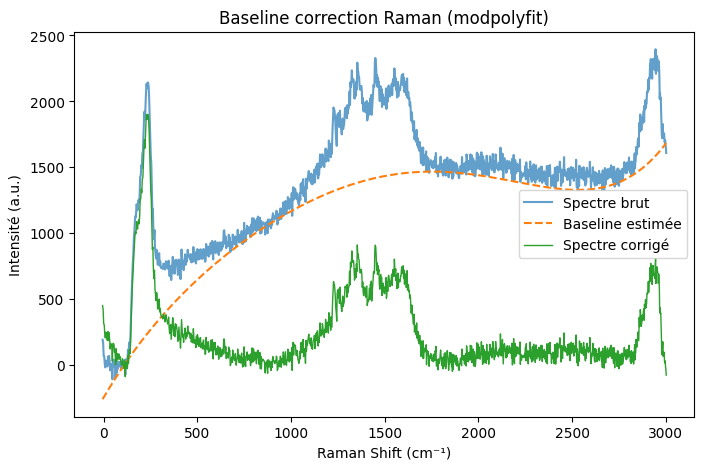

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from pybaselines import Baseline

# Exemple : on prend un seul spectre
example = spectra_df[spectra_df["Spectrum name"] == "AS004_02"]

x = example["Raman Shift"].values
y = example["Dark Subtracted #1"].values

# Initialiser le modèle
baseline_fitter = Baseline(x)

# Méthode polynomial modpolyfit (comme en R)
baseline, params = baseline_fitter.modpoly(y, poly_order=5)

# Corriger le spectre
y_corrected = y - baseline

# Affichage
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Spectre brut", alpha=0.7)
plt.plot(x, baseline, label="Baseline estimée", linestyle="--")
plt.plot(x, y_corrected, label="Spectre corrigé", linewidth=1)
plt.xlabel("Raman Shift (cm⁻¹)")
plt.ylabel("Intensité (a.u.)")
plt.legend()
plt.title("Baseline correction Raman (modpolyfit)")
plt.show()

On recommence en mettant la boucle et en ajoutant la baseline : 

In [14]:
import os
import re
import pandas as pd
from pybaselines import Baseline

In [15]:
EXPERIMENT_NAME = "AS004"
WAVELENGTH = "532nm"
EXPERIMENT_FOLDER = EXPERIMENT_NAME + "_" +WAVELENGTH

data_dir = os.path.join('/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/', EXPERIMENT_FOLDER)


spectrocopy_files = [f for f in os.listdir(data_dir)
                    if f.endswith('.txt')]

# trie dans l'ordre croissant en extrayant la partie numérique
spectrocopy_files = sorted(
    spectrocopy_files,
    key=lambda x: int(re.search(r'_(\d+)\.txt$', x).group(1)) 
)

print(spectrocopy_files)

['AS004_01.txt', 'AS004_02.txt', 'AS004_03.txt', 'AS004_04.txt', 'AS004_05.txt', 'AS004_06.txt', 'AS004_07.txt', 'AS004_08.txt', 'AS004_09.txt', 'AS004_10.txt', 'AS004_11.txt', 'AS004_12.txt', 'AS004_13.txt', 'AS004_14.txt']


In [20]:
all_data = []

for fname in spectrocopy_files:   # ta liste triée
    file_path = os.path.join(data_dir, fname)

    # repérer la ligne de l'en-tête
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    header_idx = next(i for i, line in enumerate(lines)
                      if line.strip().startswith('Pixel;'))

    # lire le fichier
    df = pd.read_csv(file_path,
                     skiprows=header_idx,
                     sep=";",
                     decimal=",",
                     encoding="utf-8",
                     skipinitialspace=True,
                     na_values=["", " ", "   ", "\t"],
                     keep_default_na=True)

    # supprimer la dernière colonne si vide
    if df.columns[-1].startswith("Unnamed"):
        df = df.iloc[:, :-1]

    # convertir en numérique
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # garder seulement les colonnes utiles
    temp = df[["Wavenumber", "Wavelength", "Raman Shift", "Dark Subtracted #1"]].copy()
    temp = temp.dropna()

    # baseline correction avec modpolyfit
    x = temp["Raman Shift"].values
    y = temp["Dark Subtracted #1"].values
    baseline_fitter = Baseline(x)
    baseline, _ = baseline_fitter.modpoly(y, poly_order=5)

    # ajouter la colonne corrigée
    temp["Intensity_corrected"] = y - baseline
    temp = temp.dropna(subset=["Intensity_corrected"])

    # ajouter une colonne "fichier"
    temp["file"] = fname

    # stocker dans la liste
    all_data.append(temp)

# fusionner tous les fichiers
spectra_df = pd.concat(all_data, ignore_index=True)

spectra_df.head()
# print(spectra_df["file"].unique())

,Wavenumber,Wavelength,Raman Shift,Dark Subtracted #1,Intensity_corrected,file
0,18799.81,531.92,-4.95,299.3333,512.206956,AS004_01.txt
1,18796.91,532.00,-2.05,228.0000,435.224384,AS004_01.txt
2,18794.01,532.08,0.86,139.3333,340.952553,AS004_01.txt
3,18791.11,532.17,3.76,7.6667,203.763029,AS004_01.txt
4,18788.21,532.25,6.65,27.6667,218.321212,AS004_01.txt


In [21]:
# Lecture du fichier Excel de métadonnées :
metadata_df = pd.read_excel("/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/AS004_metadata.xlsx", skiprows=1)
metadata_df.head()

#  Création d'une clé de jointure dans spectra_df 
# (on enlève ".txt" pour matcher le nom type"AS00X_Y" dans l'Excel
spectra_df["Spectrum name"] = spectra_df["file"].str.replace(".txt", "", regex=False)

# Fusion des deux tables : 
combined_df = pd.merge(
    spectra_df,
    metadata_df,
    on="Spectrum name",
    how="left"   # garde toutes les lignes de spectra_df
)

# Print du résultat
print(combined_df.head())
print(combined_df.columns)

# Sauvegarde
# combined_df.to_excel("Spectres_fusionnés.xlsx", index=False)

   Wavenumber  Wavelength  Raman Shift  Dark Subtracted #1  \
0    18799.81      531.92        -4.95            299.3333   
1    18796.91      532.00        -2.05            228.0000   
2    18794.01      532.08         0.86            139.3333   
3    18791.11      532.17         3.76              7.6667   
4    18788.21      532.25         6.65             27.6667   

   Intensity_corrected          file Spectrum name Sample description  \
0           512.206956  AS004_01.txt      AS004_01        Cuvette BRB   
1           435.224384  AS004_01.txt      AS004_01        Cuvette BRB   
2           340.952553  AS004_01.txt      AS004_01        Cuvette BRB   
3           203.763029  AS004_01.txt      AS004_01        Cuvette BRB   
4           218.321212  AS004_01.txt      AS004_01        Cuvette BRB   

   nb average  laser.pwr  laser.WL (nm)  acq.time (s)  pH  C(EGTA) (µM)  \
0           1         30            532             3 NaN           0.0   
1           1         30            53

/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors
/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors


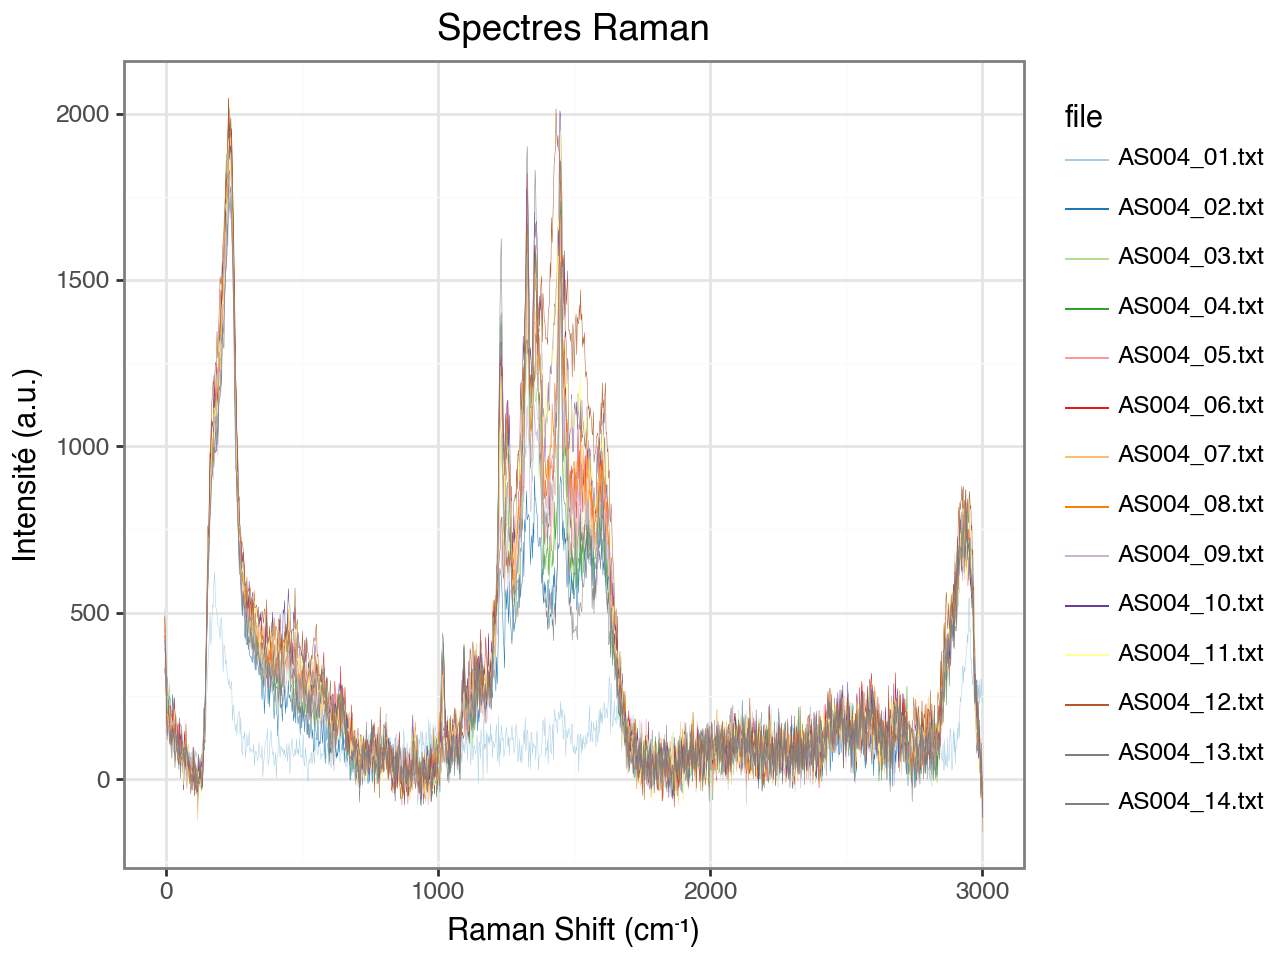

In [22]:
from plotnine import ggplot, aes, geom_line, theme_bw, labs, scale_color_brewer

p = (
    ggplot(combined_df, aes(x="Raman Shift", y="Intensity_corrected", color="file"))
    + geom_line(size=0.1)
    + theme_bw()
    + labs(
        title="Spectres Raman",
        x="Raman Shift (cm⁻¹)",
        y="Intensité (a.u.)"
    )
    + scale_color_brewer(type='qual', palette='Paired')  # ou 'Dark2', 'Paired', etc.
)

p


/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors
/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2651 rows containing missing values.
/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning: Warning message:Brewer palette Paired has a maximum of 12 colors Returning the palette you asked for with that many colors


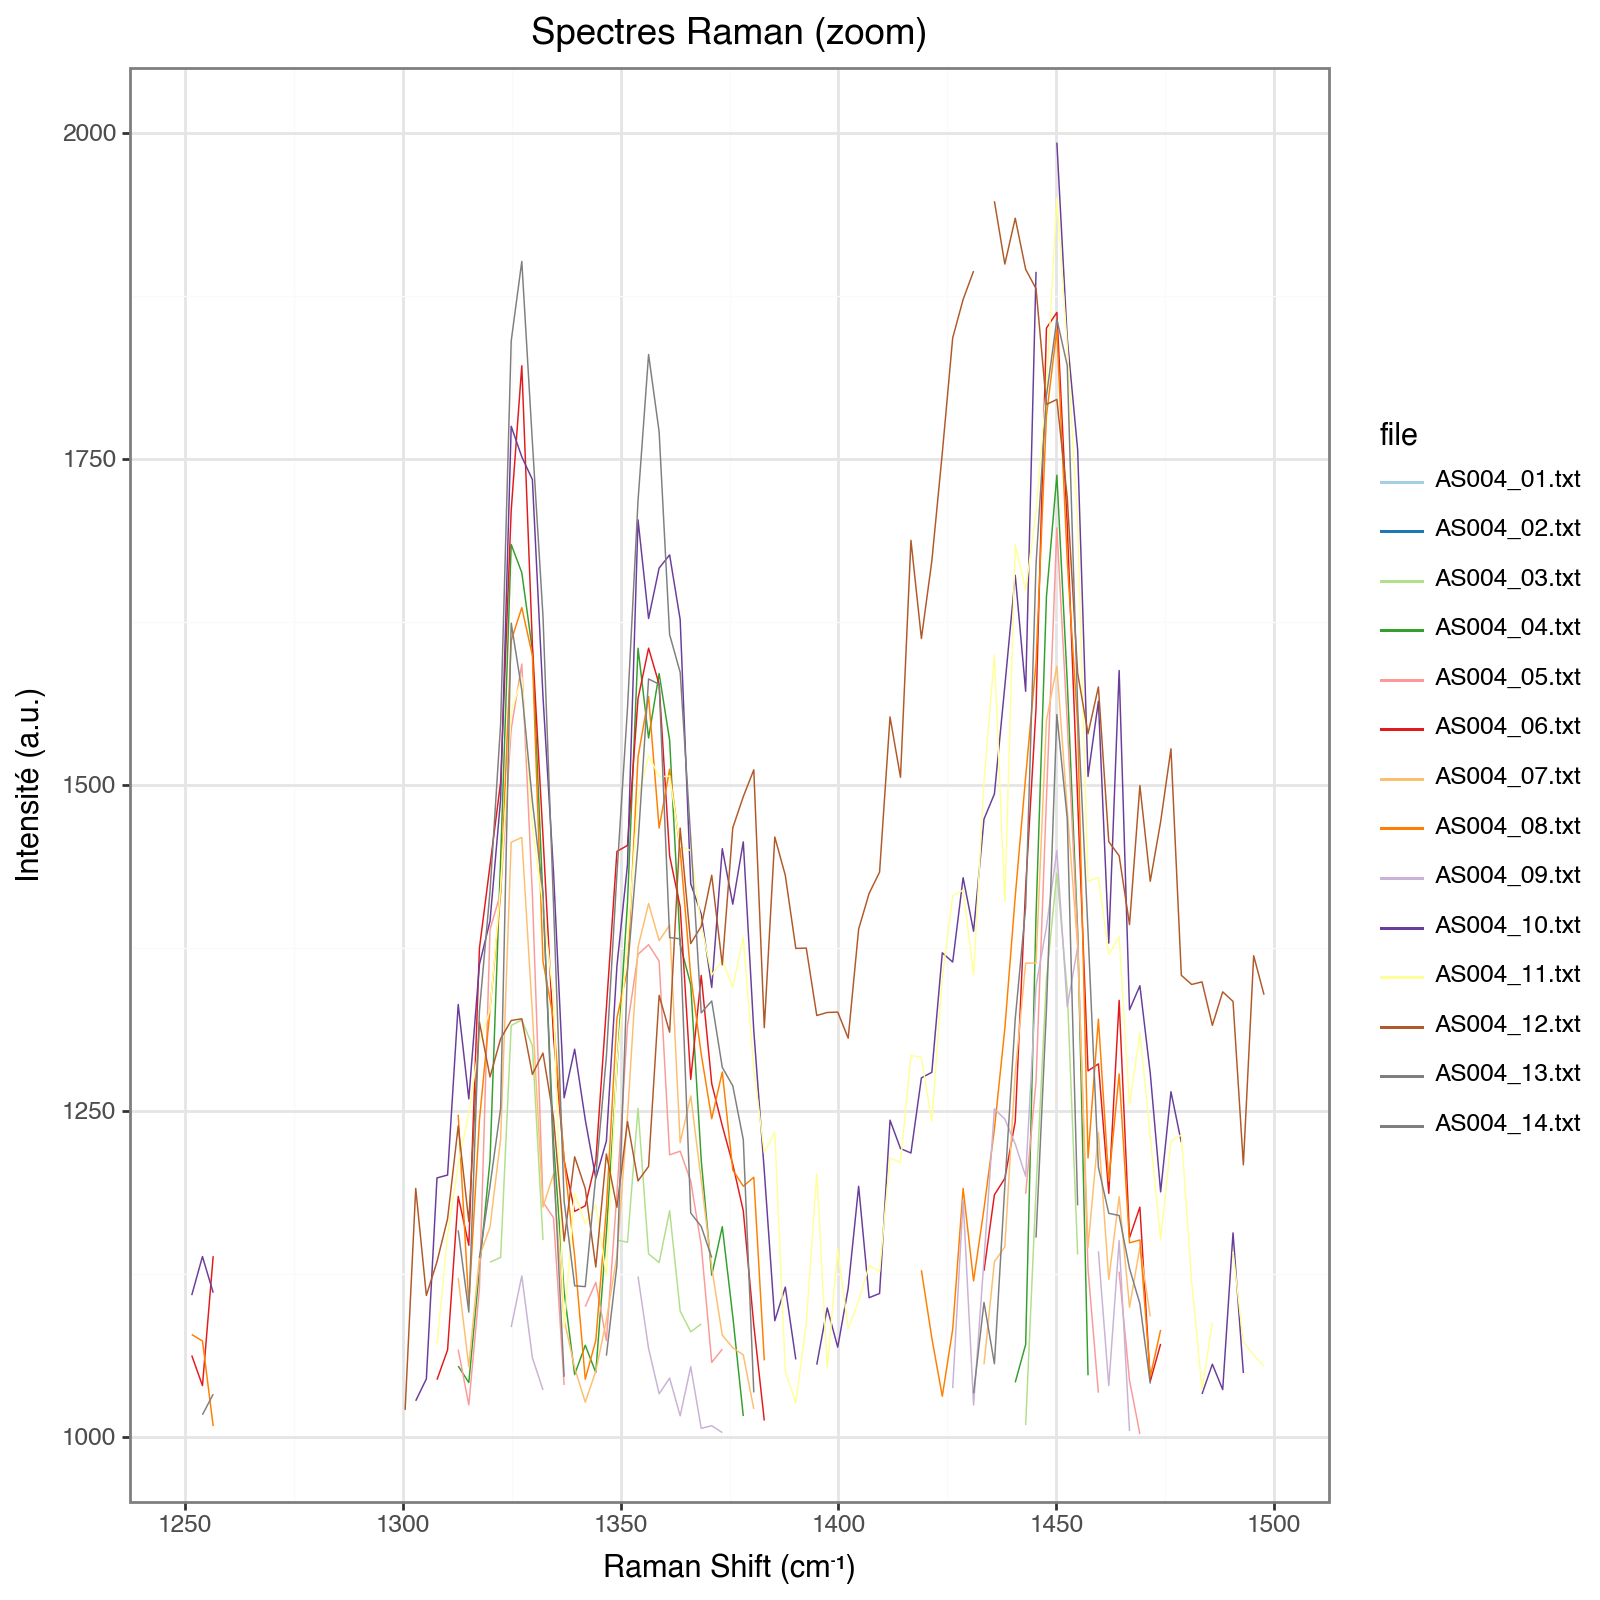

In [23]:
from plotnine import ggplot, aes, geom_line, theme_bw, labs, scale_color_brewer, xlim, ylim, theme

p = (
    ggplot(combined_df, aes(x="Raman Shift", y="Intensity_corrected", color="file"))
    + geom_line(size=0.3)
    + theme_bw()
    + labs(
        title="Spectres Raman (zoom)",
        x="Raman Shift (cm⁻¹)",
        y="Intensité (a.u.)"
    )
    + scale_color_brewer(type='qual', palette='Paired')
    + xlim(1250, 1500)      # zoom axe X
    + ylim(1000, 2000)      # zoom axe Y
    + theme(figure_size=(8, 8))  # largeur=5, hauteur=8 pouces
)

p